## Question:
Habving a car rental business and having the option of two different fuel types (E10 and SP98), which one is better to use, and when?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Getting the data

In [2]:
data = pd.read_csv('/Users/mmacor/Desktop/IronHack/tech_challenge/measurements.csv')
data2 = pd.read_excel('/Users/mmacor/Desktop/IronHack/tech_challenge/measurements2.xlsx')

We can notice below that there are a lot of NaNs

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


I wrote a function below to clean the column names, and transform objects in floats, where applicable.

In [4]:
def clean_df(df):
    n_cols= []
    for i in range(len(df.columns)):
        n_cols.append(df.columns[i].lower().replace(' ', '_'))
    df.columns = n_cols
    
    lst = ['distance', 'consume', 'temp_inside']
    for col in lst:
        df[col] = df[col].str.replace(',', '.').astype(float)
    return df

In [5]:
clean_df(data)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [6]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [7]:
data2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

Checking if the two datasets are the same - they are! I will therefore use only one dataset.

In [8]:
data.merge(data2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,AC,refill liters,refill gas


We can see that there are many NaNs in ['specials', 'refill_liters', 'refill_gas']

In [9]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [10]:
data.shape

(388, 12)

Finding the Percentage of NaNs in each column

In [11]:
data.isna().sum()/len(data)*100

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

There are too many NaNs in ['specials', 'refill_liters', 'refill_gas'], so am dropping them.

In [12]:
cols_to_drop = ['specials', 'refill_liters', 'refill_gas']
data.drop(cols_to_drop, axis=1, inplace=True)

Checking if there are still NaNs

In [13]:
data.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
ac               0
rain             0
sun              0
dtype: int64

Since they are really a few, I will replace the NaNs with the mode of the column.

In [14]:
median = data['temp_inside'].median()

data['temp_inside'].fillna(median, inplace=True)

I would like to have the gas type at the beginning

In [15]:
data = data[['gas_type', 'distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'ac', 'rain', 'sun']]

In [16]:
data.head()

,gas_type,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,E10,28.0,5.0,26,21.5,12,0,0,0
1,E10,12.0,4.2,30,21.5,13,0,0,0
2,E10,11.2,5.5,38,21.5,15,0,0,0
3,E10,12.9,3.9,36,21.5,14,0,0,0
4,E10,18.5,4.5,46,21.5,15,0,0,0


## Assumptions (such info was not provided)
- Distance -> Km
- Consume -> lt/100km
- speed -> min
- temp -> Celsius

# EDA

In [17]:
data.dtypes

gas_type         object
distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
ac                int64
rain              int64
sun               int64
dtype: object

In [18]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.931701,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.994741,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


I'm going to create some features that are going to be useful later

In [19]:
data['temp_diff'] = data.temp_inside - data.temp_outside

In [20]:
data['fuel_used'] = data.distance * data.consume/100

In [21]:
data.head()

,gas_type,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,temp_diff,fuel_used
0,E10,28.0,5.0,26,21.5,12,0,0,0,9.5,1.4000
1,E10,12.0,4.2,30,21.5,13,0,0,0,8.5,0.5040
2,E10,11.2,5.5,38,21.5,15,0,0,0,6.5,0.6160
3,E10,12.9,3.9,36,21.5,14,0,0,0,7.5,0.5031
4,E10,18.5,4.5,46,21.5,15,0,0,0,6.5,0.8325


## Fuel prices in Amsterdam (where I am located)

### E10 = 2.137
### SP98 = 2.279

Creating another column with the cost of the trip, based on the prices in July 2024

In [22]:
data['cost_of_trip'] = np.where(data.gas_type == 'E10', data.fuel_used*2.137, data.fuel_used*2.152).round(3)

Converting speed into decimals of an hour, and creating another column for the average of the speed

In [23]:
data['trip_in_hours'] = data.speed/60

In [24]:
data['avg_speed'] = data['distance']/data['trip_in_hours']

Dropping the speed column as it's not useful anymore.

In [25]:
data.drop(['speed'], axis=1, inplace=True)

In [26]:
data.head()

,gas_type,distance,consume,temp_inside,temp_outside,ac,rain,sun,temp_diff,fuel_used,cost_of_trip,trip_in_hours,avg_speed
0,E10,28.0,5.0,21.5,12,0,0,0,9.5,1.4000,2.992,0.433333,64.615385
1,E10,12.0,4.2,21.5,13,0,0,0,8.5,0.5040,1.077,0.500000,24.000000
2,E10,11.2,5.5,21.5,15,0,0,0,6.5,0.6160,1.316,0.633333,17.684211
3,E10,12.9,3.9,21.5,14,0,0,0,7.5,0.5031,1.075,0.600000,21.500000
4,E10,18.5,4.5,21.5,15,0,0,0,6.5,0.8325,1.779,0.766667,24.130435


### All cleaning is completed!

## Visualizations

There are more trips done with SP98 gasoline.

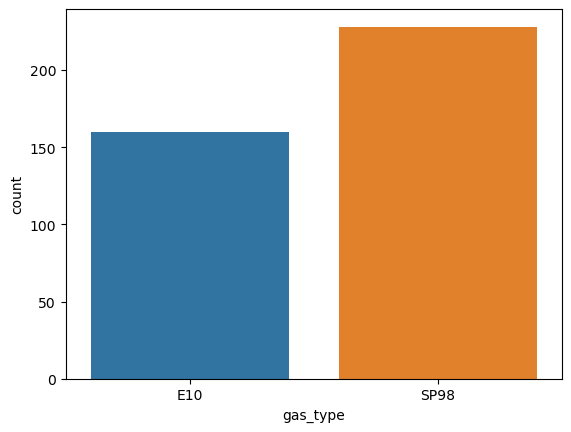

In [27]:
fig, ax = plt.subplots()
sns.countplot(x=data.gas_type)
plt.show()

In [28]:
data_num = data.select_dtypes(np.number)

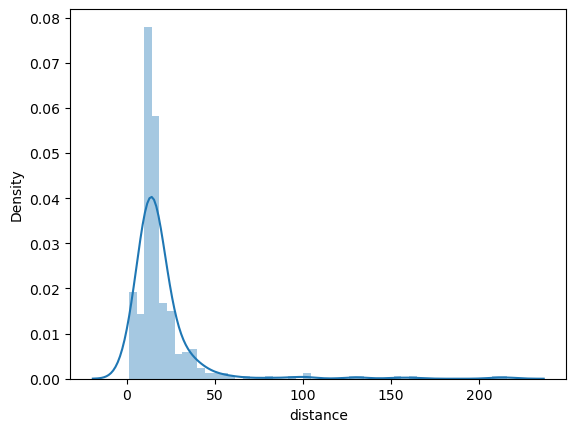

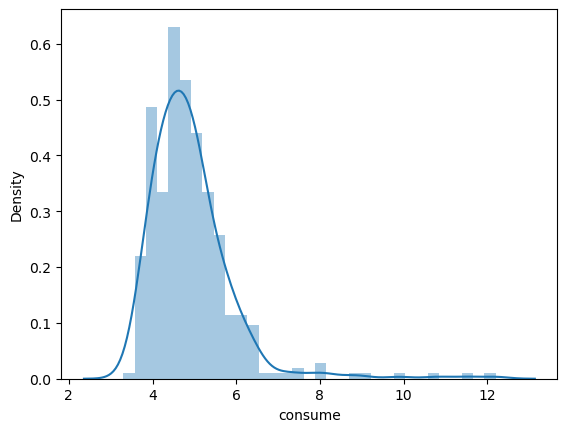

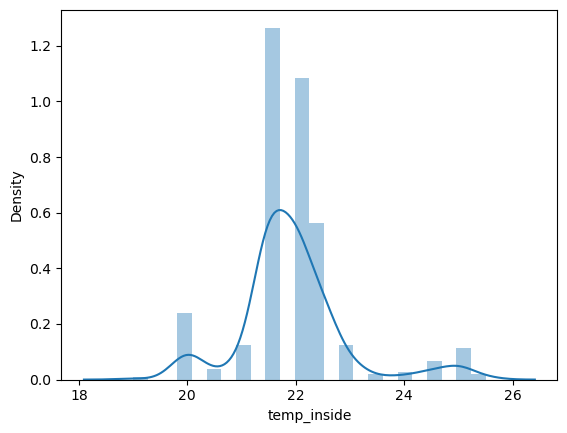

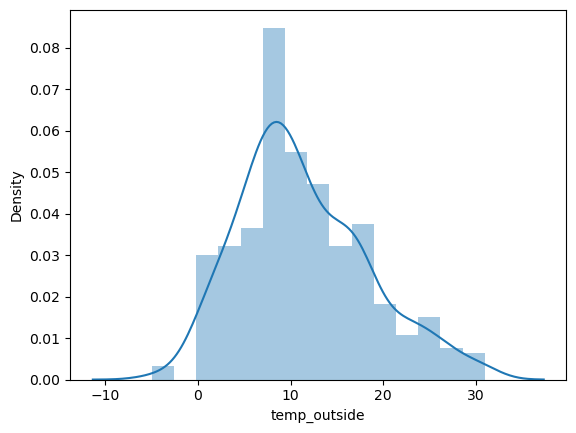

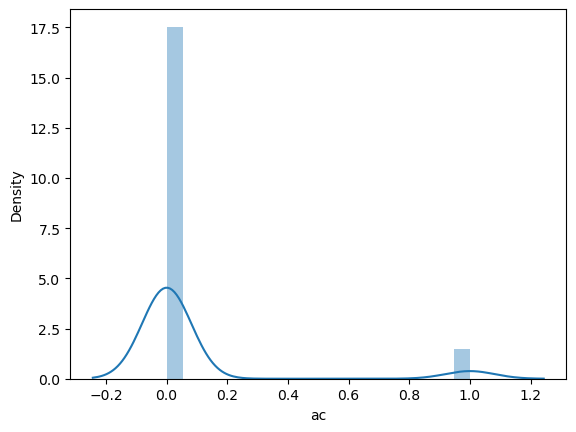

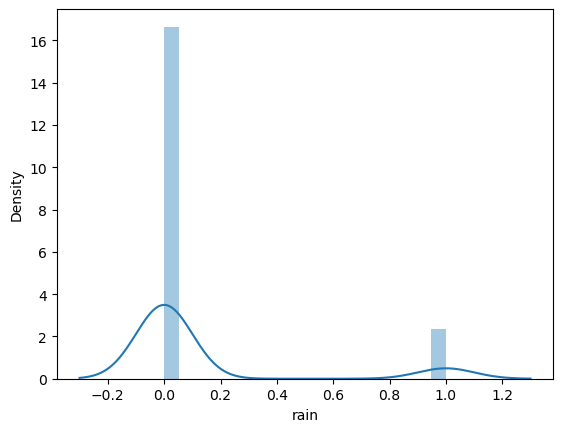

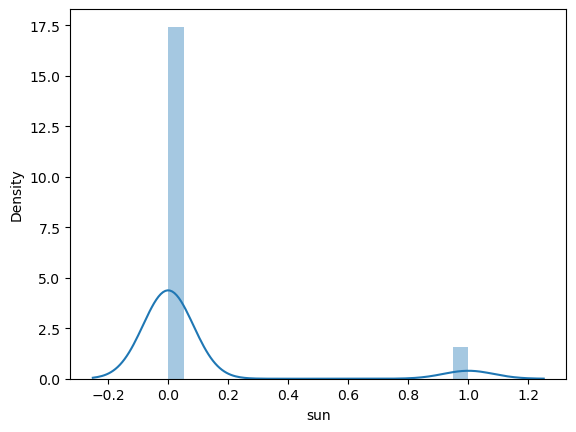

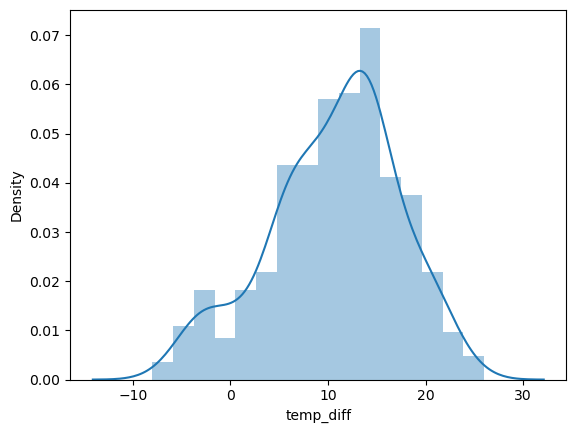

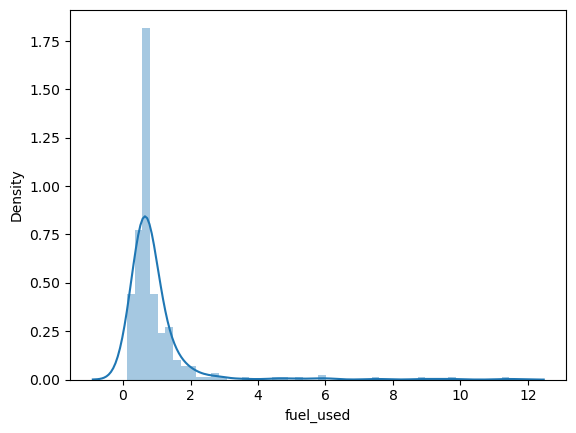

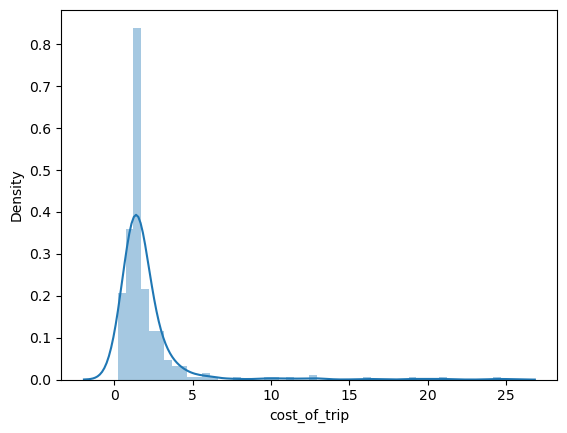

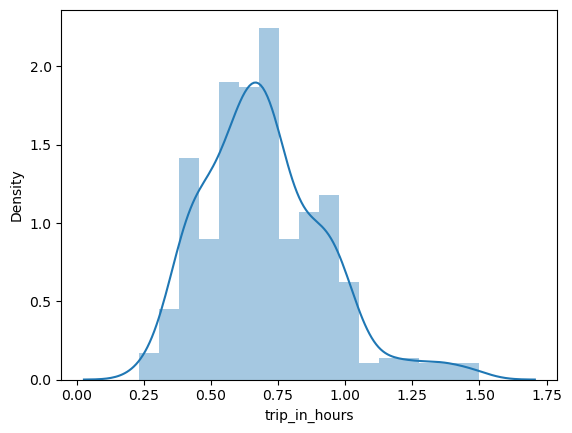

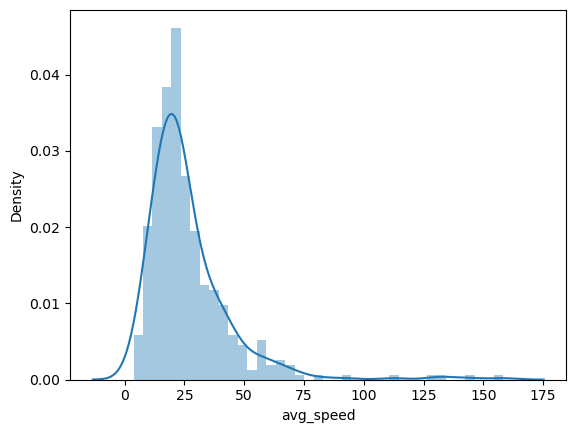

In [29]:
for col in data_num:
    sns.distplot(data_num[col])
    plt.show()

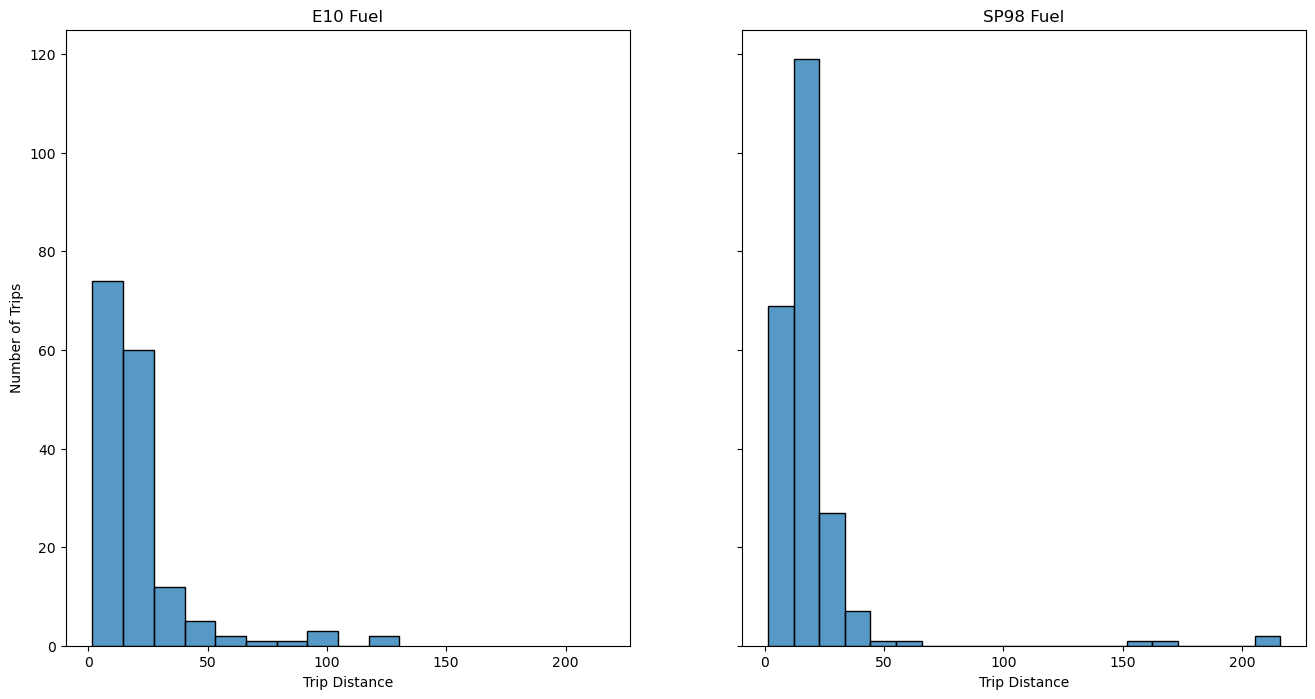

In [30]:
fig, axes = plt.subplots(1,2, figsize=(16,8), sharey=True, sharex=True)
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

sns.histplot(ax=axes[0], data=cole10, x=cole10['distance'], bins=10, label = 'E10').set(title='E10 Fuel')
axes[0].set(xlabel='Trip Distance', ylabel='Number of Trips')

sns.histplot(ax=axes[1], data=col98, x=col98['distance'], bins=20, label = 'SP98').set(title='SP98 Fuel')
axes[1].set(xlabel='Trip Distance', ylabel='Number of Trips')

plt.ylabel('Number of Trips')
plt.show()

### We can see from the graph above that the fuel SP98 is more used for longer trips.


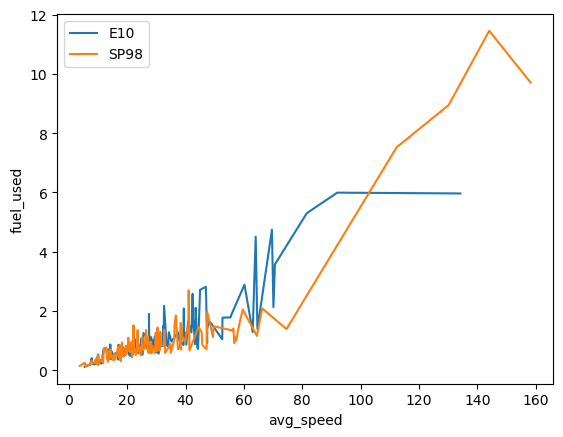

In [31]:
fig, ax = plt.subplots()
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

ax1 = sns.lineplot(data=cole10, x=cole10['avg_speed'], y=cole10['fuel_used'], label='E10')
ax2 = sns.lineplot(data=col98, x=col98['avg_speed'], y=col98['fuel_used'], label='SP98')

plt.legend(loc='upper left')
plt.show()

### Above, we can see that the SP98, despite being a better fuel, burns much faster and more than the E10 at higher speeds. It's the opposite for lower speeds.

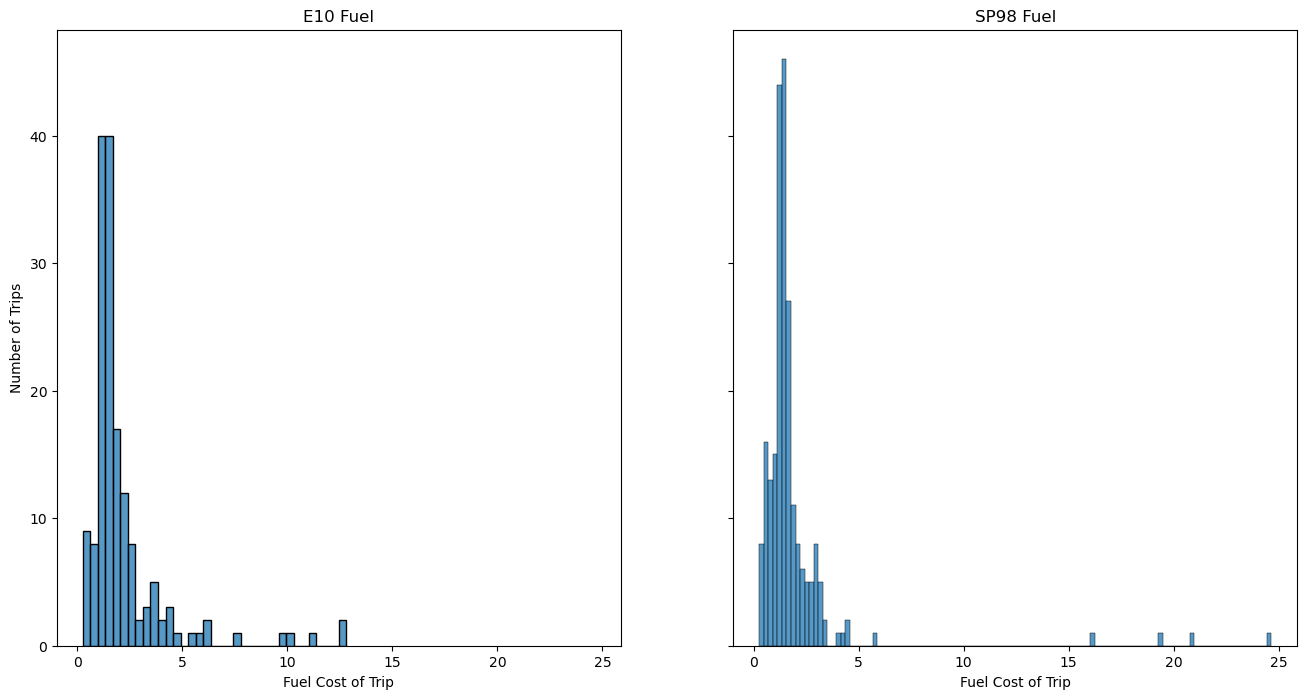

In [32]:
fig, axes = plt.subplots(1,2, figsize=(16,8), sharey=True, sharex=True)
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

sns.histplot(ax=axes[0], data=cole10, x=cole10['cost_of_trip'], label = 'E10').set(title='E10 Fuel')
axes[0].set(xlabel='Fuel Cost of Trip', ylabel='Number of Trips')

sns.histplot(ax=axes[1], data=col98, x=col98['cost_of_trip'], label = 'SP98').set(title='SP98 Fuel')
axes[1].set(xlabel='Fuel Cost of Trip', ylabel='Number of Trips')

plt.ylabel('Number of Trips')
plt.show()

### We can see above the distribution of the fuel cost for each fuel type; there are 4 outliers for the fuel SP98, but that fuel has also been used for the longest trips. To properly compare the two fuels, it would be a good idea to test the E10 on longer trips with higher average speeds.

min 6:35

## Conclusions:

- When the cars travel at higher speed, it looks like the E10 performs better, moreover it's cheaper; thus, it's a good idea to try and assign cars using this fuel for such trips.

- For short distances or in an urban environment, there is no much difference between the two fuel types.

- The E10 is normally much cheaper than the SP98, so in general, and because the performance or savings from choosing the SP98 over the E10, it's adviseable to choose more often the E10.

---

## Hypothesis testing

### Null Hypothesis: consuptions of both fuels are the same
#### Running a one-sided ttest to determine if we can accept or reject the hypothesis

In [33]:
from scipy.stats import ttest_ind

In [34]:
stat, pval = ttest_ind(data[data.gas_type == 'E10'].fuel_used, data[data.gas_type == 'SP98'].fuel_used)
print('The p-value of the test is: ', pval)
print('The stat value of the test is: ', stat)

The p-value of the test is:  0.27679289437741406
The stat value of the test is:  1.089091767035112


#### The p-value > 0.05, therefore we can accept the null hypothesis (both fuels consumptions are almost equal)

### Second Hypothesis: Fuel types cost about the same per trip

In [35]:
stat, pval = ttest_ind(data[data.gas_type == 'E10'].cost_of_trip, data[data.gas_type == 'SP98'].cost_of_trip)
print('The p-value of the test is: ', pval)
print('The stat value of the test is: ', stat)

The p-value of the test is:  0.30362825691112855
The stat value of the test is:  1.0300569581393824


### Again, the p-value > 0.05 so we can accept the null hypothesis (fuel types cost more or less the same per trip). This, however, depends on the current fuel price. Usually, the SP98 is more expensive.

---

## Models comparison

In [36]:
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

I want to see the correlations in a heatmap

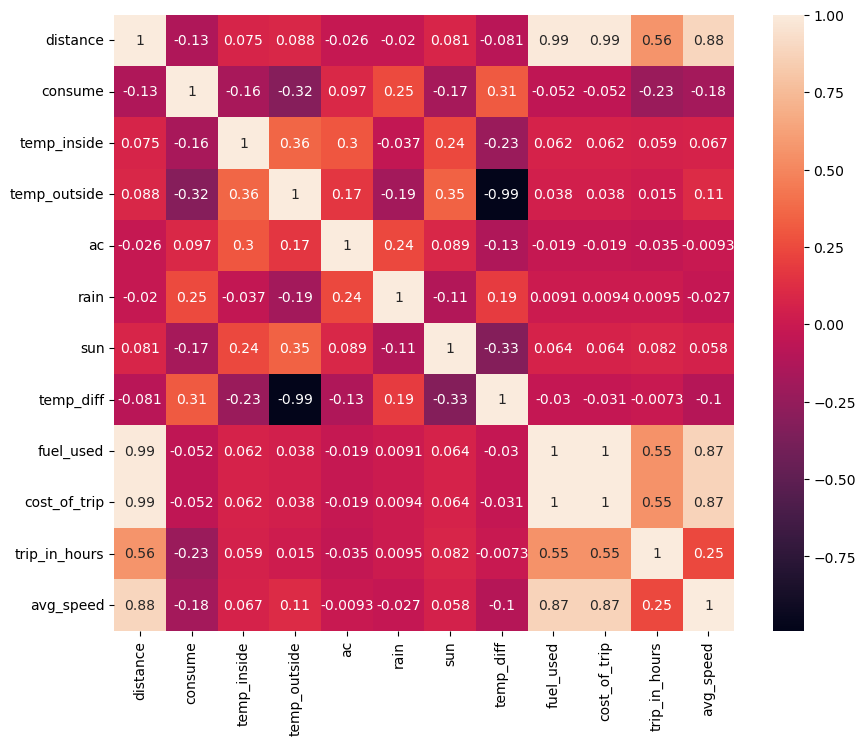

In [37]:
correlations = data.corr()

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations, annot=True)
plt.show()

Features with highest multicollinearity are the ones we created earlier, so am dropping them.

In [38]:
cols_to_drop = ['temp_diff', 'cost_of_trip', 'fuel_used', 'avg_speed']
data = data.drop(cols_to_drop, axis = 1)

### Let's try to predict the amount of fuel consumed
#### Splitting data in X-features and y-target

In [39]:
X = data.drop('consume', axis=1)
y = data['consume']

#### Splitting into train and test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape is: ', X_train.shape)
print('y_train shape is: ', y_train.shape)
print('X_test shape is: ', X_test.shape)
print('y_test shape is: ', y_test.shape)

X_train shape is:  (310, 8)
y_train shape is:  (310,)
X_test shape is:  (78, 8)
y_test shape is:  (78,)


In [41]:
X_test.isna().sum()

gas_type         0
distance         0
temp_inside      0
temp_outside     0
ac               0
rain             0
sun              0
trip_in_hours    0
dtype: int64

In [42]:
y_test.isna().sum()

0

#### Getting numerical and categorical data

In [43]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

#### Trasforming and scaling numerical data

In [44]:
# Only trasforming on the train data!
transformer = MinMaxScaler().fit(X_train_num)

X_train_norm = transformer.transform(X_train_num)
print(X_train_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()

(310, 7)


,distance,temp_inside,temp_outside,ac,rain,sun,trip_in_hours
63,0.025605,0.384615,0.305556,0.0,0.0,0.0,0.157895
238,0.048883,0.538462,0.194444,0.0,0.0,0.0,0.342105
132,0.068901,0.384615,0.305556,0.0,0.0,0.0,0.250000
101,0.115922,0.307692,0.361111,1.0,1.0,0.0,0.750000
351,0.068436,0.461538,0.611111,0.0,0.0,0.0,0.421053


In [45]:
X_test_norm = transformer.transform(X_test_num)
print(X_test_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()

(78, 7)


,distance,temp_inside,temp_outside,ac,rain,sun,trip_in_hours
271,0.013501,0.461538,0.638889,0.0,0.0,0.0,0.236842
46,0.060056,0.384615,0.333333,0.0,0.0,0.0,0.236842
167,0.051210,0.384615,0.305556,0.0,0.0,0.0,0.342105
42,0.048417,0.384615,0.305556,0.0,0.0,0.0,0.302632
349,0.079143,0.461538,0.583333,0.0,0.0,0.0,0.421053


#### Encoding now the only categorical column

In [46]:
X_train_cat['gas_type'] = np.where(X_train_cat['gas_type'] == 'E10', 1, 0)
X_train_cat['gas_type']

63     0
238    1
132    0
101    0
351    0
      ..
71     0
106    0
270    1
348    1
102    0
Name: gas_type, Length: 310, dtype: int64

In [47]:
X_test_cat['gas_type'] = np.where(X_test_cat['gas_type'] == 'E10', 1, 0)
X_test_cat['gas_type']

271    1
46     0
167    1
42     1
349    0
      ..
3      1
18     1
93     0
108    0
255    1
Name: gas_type, Length: 78, dtype: int64

#### Merging numerical and categorical back together

In [48]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

### Trying linear regression first

In [49]:
linear_model = LinearRegression()     # model creation
linear_model.fit(X_train, y_train)    # model training
y_pred = linear_model.predict(X_test) # model prediction

In [50]:
print('The R2 score is: ', linear_model.score(X_test, y_test))

The R@ score is:  0.09412310938686319


### The error is too high, so checking other models too

In [51]:
def models_check(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

In [52]:
model_list = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor()]
models_check(model_list, X_train, y_train)

LinearRegression: Train -> 0.2228221942394596, Test -> 0.09412310938686319
KNeighborsRegressor: Train -> 0.6669589460300982, Test -> 0.43587858805626767
DecisionTreeRegressor: Train -> 0.9995763862324677, Test -> -0.15829657340060277


### The KNeighbors model works best